In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
data = pd.read_csv('train.csv')

# Initial data structure
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
# Summary of Features and Target Variable

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
# Descriptive Statistics:

data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
### Data Cleaning And Preprocessing
# Check for missing or null values

print("\nMissing or Null Values:")
print(data.isnull().sum())


Missing or Null Values:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


There is no missing values or values in a wrong format in the dataset.

In [9]:
### Statistical Analysis With NumPy And SciPy
# Calculate measures of central tendency and variability

print("\nMeasures of Central Tendency and Variability:")
for column in data.select_dtypes(include=[np.number]).columns:
    print(f"\n{column}:")
    print(f"Mean: {data[column].mean()}")
    print(f"Median: {data[column].median()}")
    print(f"Mode: {data[column].mode()[0]}")
    print(f"Range: {data[column].max() - data[column].min()}")
    print(f"Variance: {data[column].var()}")
    print(f"Standard Deviation: {data[column].std()}")
    print(f"Skewness: {data[column].skew()}")
    print(f"Kurtosis: {data[column].kurtosis()}")


Measures of Central Tendency and Variability:

battery_power:
Mean: 1238.5185
Median: 1226.0
Mode: 618
Range: 1497
Variance: 193088.35983766883
Standard Deviation: 439.41820608353135
Skewness: 0.03189847179278164
Kurtosis: -1.2241438831965528

blue:
Mean: 0.495
Median: 0.0
Mode: 0
Range: 1
Variance: 0.25010005002501245
Standard Deviation: 0.5001000400170075
Skewness: 0.020016015215014945
Kurtosis: -2.0016019625995645

clock_speed:
Mean: 1.52225
Median: 1.5
Mode: 0.5
Range: 2.5
Variance: 0.6658628689344672
Standard Deviation: 0.8160042088950689
Skewness: 0.1780841202790887
Kurtosis: -1.3234172221019123

dual_sim:
Mean: 0.5095
Median: 1.0
Mode: 1
Range: 1
Variance: 0.25003476738369185
Standard Deviation: 0.500034766175005
Skewness: -0.03803539334775485
Kurtosis: -2.0005548652196294

fc:
Mean: 4.3095
Median: 3.0
Mode: 0
Range: 19
Variance: 18.848133816908447
Standard Deviation: 4.341443747983894
Skewness: 1.0198114105315519
Kurtosis: 0.2770763245651877

four_g:
Mean: 0.5215
Median: 1.0
M

In [10]:
# Hypothesis testing

data1 = data.copy()

price_groups = data1['price_range'].unique()
feature = 'battery_power'

group1 = data1[data1['price_range'] == price_groups[0]][feature]
group2 = data1[data1['price_range'] == price_groups[1]][feature]
t_stat, p_val = stats.ttest_ind(group1, group2)

print(f"\nHypothesis Testing for {feature} between {price_groups[0]} and {price_groups[1]}:")
print(f"T-statistic: {t_stat}, P-value: {p_val}")


Hypothesis Testing for battery_power between 1 and 2:
T-statistic: 0.019436347802803445, P-value: 0.9844968995318757


The null hypothesis  - there is no real difference between battery power in price range 1 and price range 2 - was approoved.

This t-statistic is very close to zero, which suggests that there is almost no difference between the means of the two groups being compared.
A p-value this high (close to 1) indicates that the null hypothesis (that there is no difference between the means) cannot be rejected.

In [11]:
# Investigate feature-target correlations
print("\nFeature-Target Correlations:")
correlations = data.corr()
print(correlations['price_range'].sort_values(ascending=False))


Feature-Target Correlations:
price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64


We can see, that the most correlated feature for the price group is RAM.

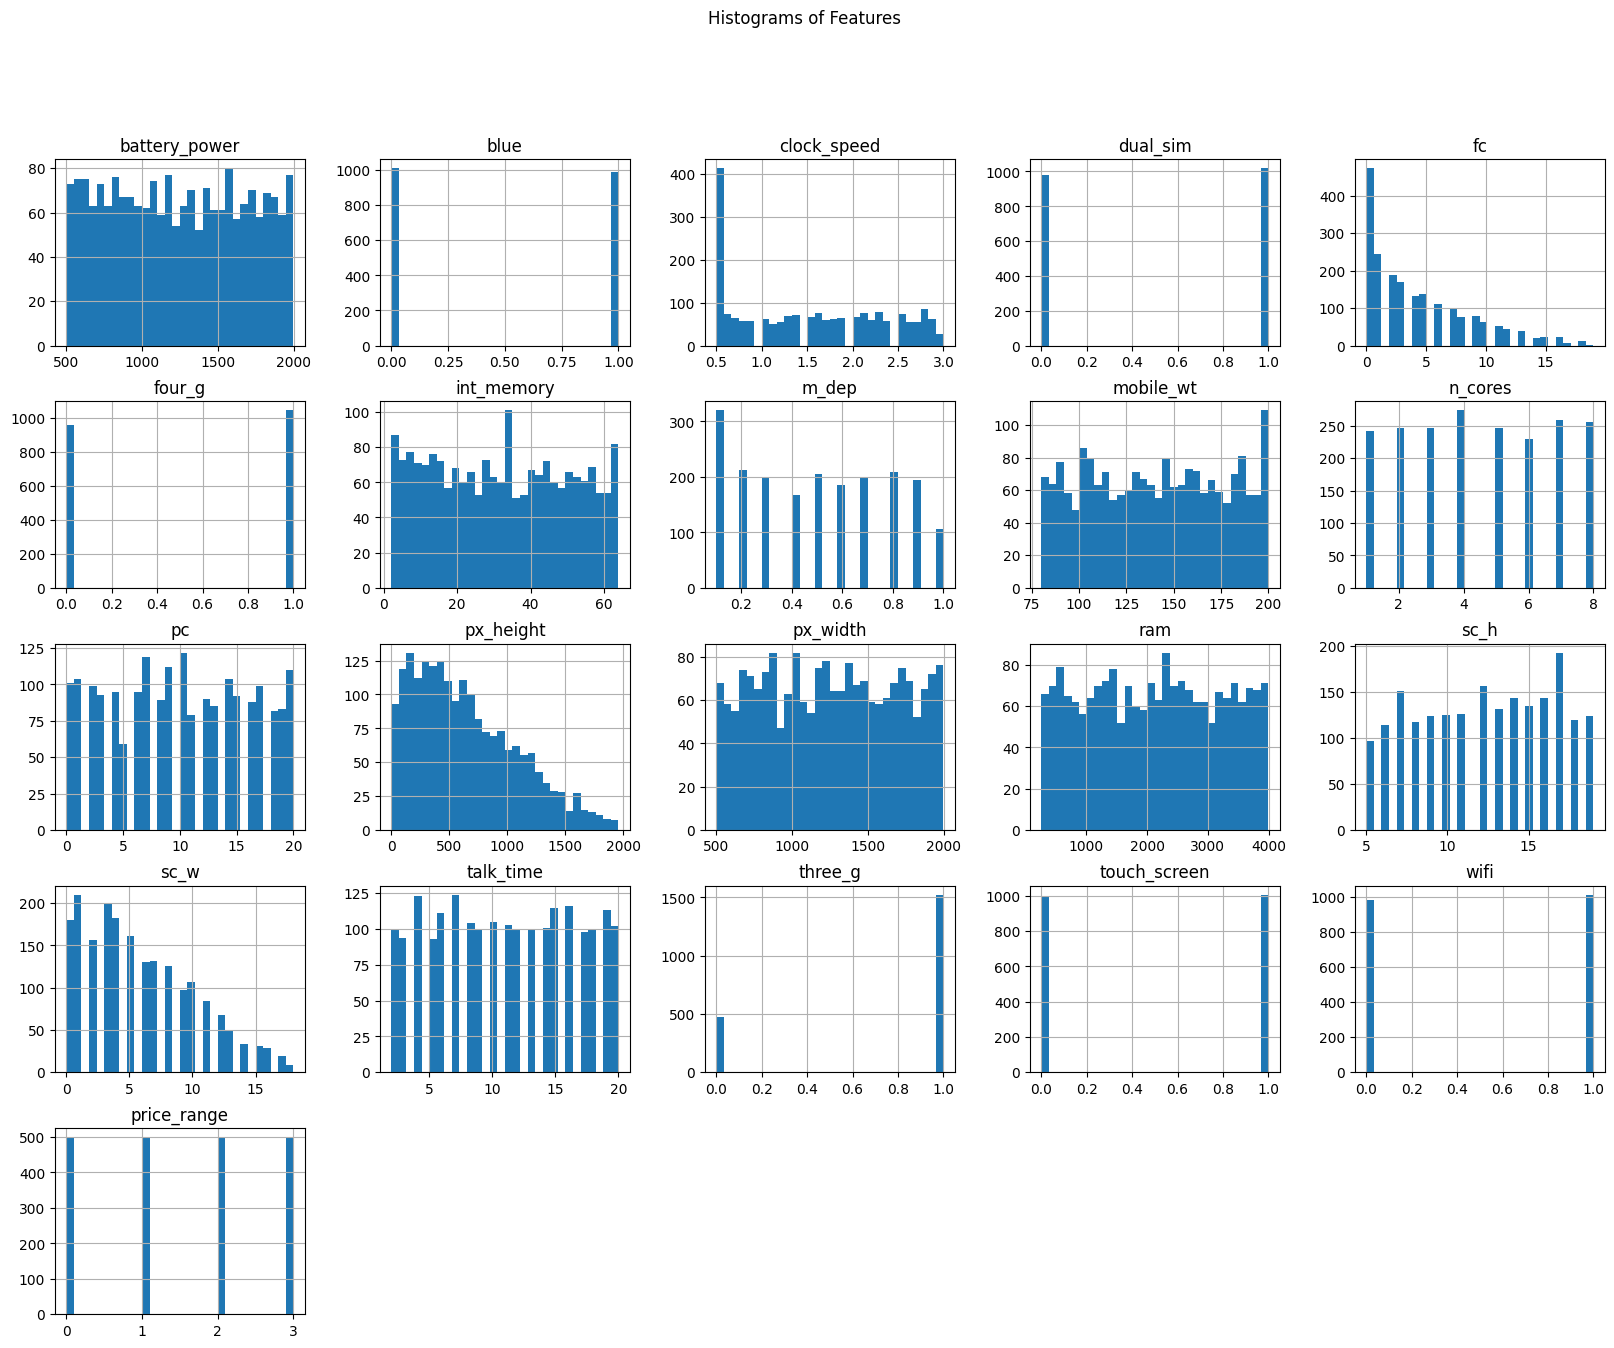

In [12]:
### Data Visualization With Matplotlib
# Histograms
data.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of Features')
plt.show()

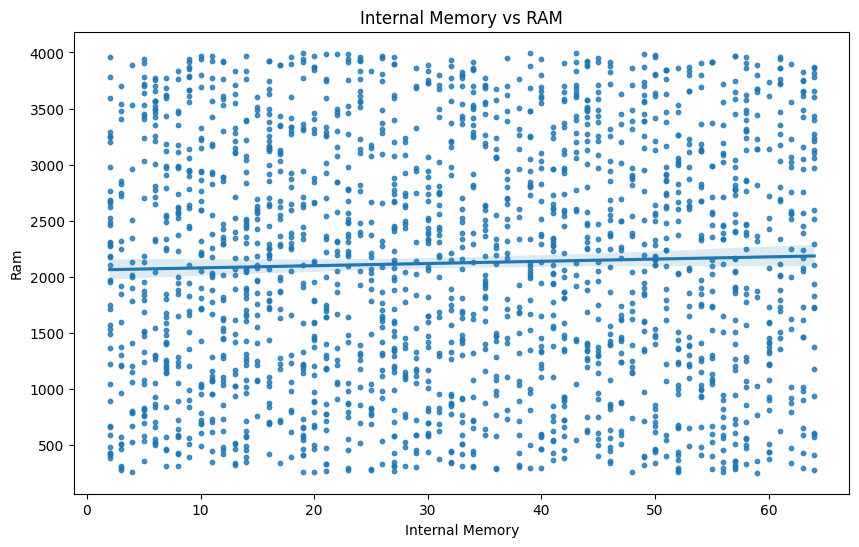

In [17]:
# Scatter plots
plt.figure(figsize=(10, 6))
sns.regplot(x='int_memory', y='ram', data=data, scatter_kws={'s':10})
plt.title('Internal Memory vs RAM')
plt.xlabel('Internal Memory')
plt.ylabel('Ram')
plt.show()

We can see, that there is a little correlation between Ram and Internal memory of the device.

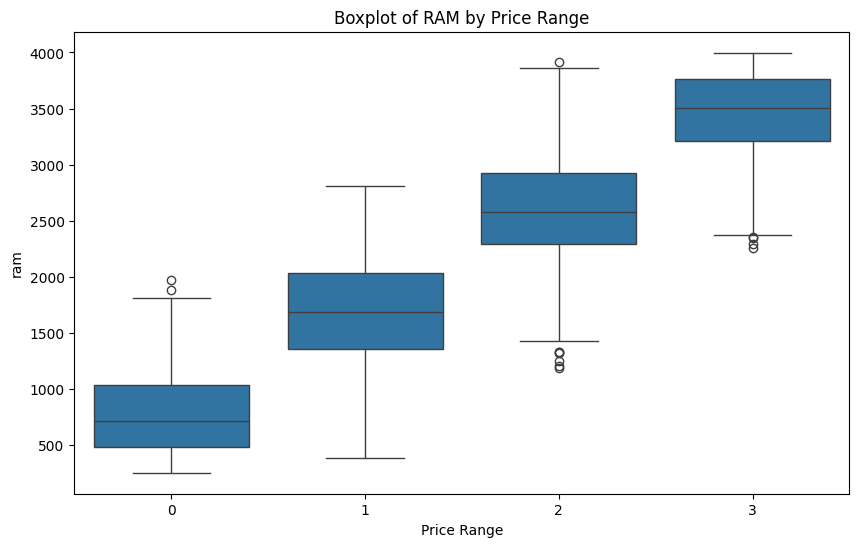

In [18]:
# Box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='ram', data=data)
plt.title('Boxplot of RAM by Price Range')
plt.xlabel('Price Range')
plt.ylabel('ram')
plt.show()

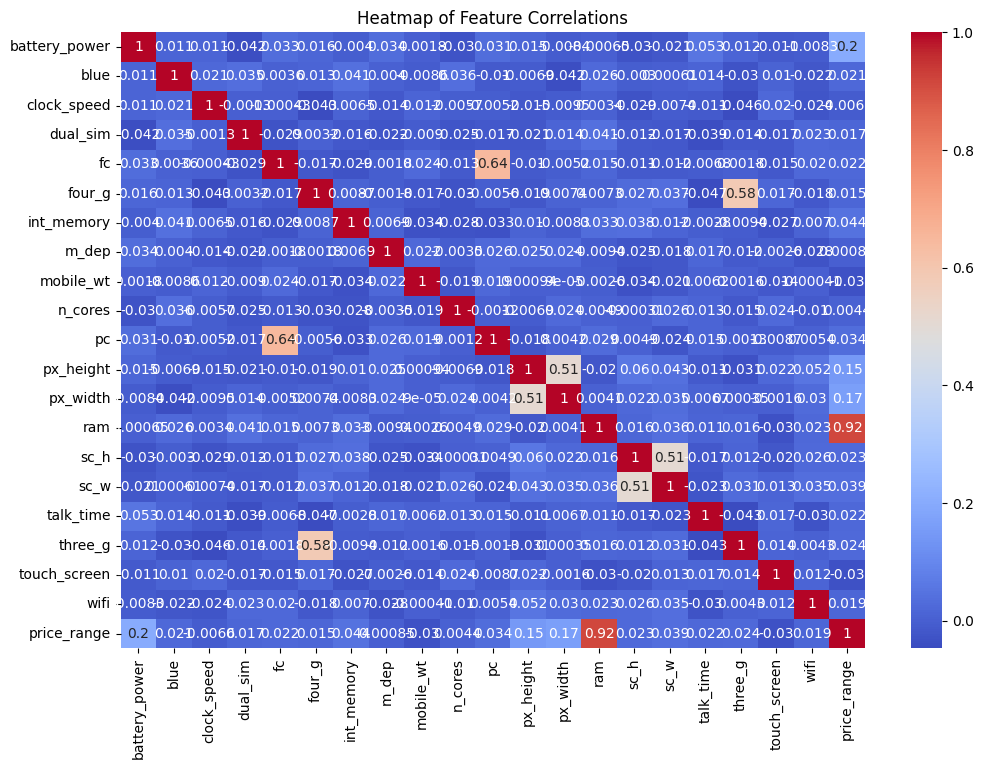

In [19]:
# Heatmap for correlation visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()

In [20]:
# 5. Insight Synthesis And Conclusion
# Derive conclusions from statistical tests and visualizations
print("\nInsight Synthesis And Conclusion:")
print("Key determinants in mobile price classification can be identified from the correlation matrix and visualizations.")
print("For example, 'battery_power' shows a significant correlation with 'price_range'.")
print("Any unexpected or significant findings should be noted based on the analysis above.")


Insight Synthesis And Conclusion:
Key determinants in mobile price classification can be identified from the correlation matrix and visualizations.
For example, 'battery_power' shows a significant correlation with 'price_range'.
Any unexpected or significant findings should be noted based on the analysis above.


### Conclusion:
Key determinants in mobile price classification can be identified from the correlation matrix and visualizations. The main one is Ram.
For example, battery power is also correlated, but not so high.
All the other features are quite random and not really correlated - like RAM and Internal memory.